#Trabalho de Avaliação e Desempenho

Grupo:<br>
Bruno Hryniewicz - 115150099 <br>
Eduardo da Silva Barbosa - 116150432 <br>
Miguel Bicudo - 116033119 <br>
Nickolas Gomes Pinto - 114148170 <br>
Rafael Pais Cardoso - 116140788 <br>
Tainá da Silva Lima - 116165607 <br>

Professor(a): Daniel Sadoc <br>
Período: 2019.2

##Questão 4

### Código-base

In [0]:
import numpy as np
import scipy as sp
import scipy.stats
import math
import time
import random
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from decimal import *

class Eventos:
  def __init__(self, tipo, fimEvento, duracaoServico):
    self.tipo = tipo
    self.fimEvento = fimEvento #Do ponto de vista do lambda é a chegada na fila e do ponto de vista de mi é o tempo de sair do servidor.
    self.duracaoServico = duracaoServico

def simulaMG1 (λ1, λ2, µ1, µ2, nEventos, X = random.expovariate, tempoTotalSimulacao = 5000): # Simula uma fila M/G/1, retornando o E(N)

  linhaDoTempo = 0
  #tempoUltimoEvento = 0
  
  area = 0
  N0 = 0
  T0 = 0
  numeroClienteT1 = 0
  numeroClienteT2 = 0
  numeroTotalCliente = 0
  tempTotalServico = 0
  fila = []  #Fila. OBS: A primeira posição representa o servidor, logo o cliente que ocupar tal posição estar no servidor.
  eventos = [] #Fila de eventos
  atualEvento = 0

  #Primeira ocorrência de eventos (λ1 e λ2)
  temp = random.expovariate(λ1)
  eventos.append(Eventos("Chegada1",temp , temp))
  if(λ2 != 0):
    temp = random.expovariate(λ2)
    eventos.append(Eventos("Chegada2", temp, temp))
  

  while(linhaDoTempo <= tempoTotalSimulacao):

    #eventos = sorted(eventos,key=attrgetter('fimEvento'))
    eventos.sort(key=lambda eventos: eventos.fimEvento)

    #print(eventos)
    atualEvento = eventos[0] #Pega o primeiro evento
    eventos = eventos[1:] #Tira o primeiro evento da fila de eventos
    linhaDoTempo = atualEvento.fimEvento #Avança a linha do tempo

    filaAux = fila[1:] #Não podemos considerar a posição 0 na ordenação, uma vez que a mesma repesenta o servidor. 
    filaAux.sort()

    for i in range(0,len(filaAux)):
      fila[i+1] = filaAux[i]

    if(atualEvento.tipo == "Chegada1"):
      numeroClienteT1 += 1
      fila.append(1)
      temp = random.expovariate(λ1)
      eventos.append(Eventos("Chegada1", linhaDoTempo + temp, temp))

      if(len(fila) == 1):
        temp =  X(µ1)
        eventos.append(Eventos("Servico1", linhaDoTempo + temp, temp))
        numeroClienteT1 -= 1

    elif(atualEvento.tipo == "Chegada2"):
      numeroClienteT2 += 1
      fila.append(2)
      temp = random.expovariate(λ2)
      eventos.append(Eventos("Chegada2", linhaDoTempo +temp, temp))
      #temp = random.expovariate(λ1)
      #eventos.append(Eventos("Chegada1", linhaDoTempo + temp, temp))

      if(len(fila) == 1):
        temp =  X(µ2)
        eventos.append(Eventos("Servico2", linhaDoTempo + temp, temp))
        numeroClienteT2 -= 1

    elif(atualEvento.tipo == "Servico1"):
      fila = fila[1:]
      numeroTotalCliente += 1
      tempTotalServico += atualEvento.duracaoServico

      if(len(fila) != 0 and fila[0] == 1):
        temp =  X(µ1)
        eventos.append(Eventos("Servico1", linhaDoTempo + temp, temp))
      elif(µ2 != 0 and len(fila) != 0 and fila[0] == 2 ):
        temp =  X(µ2)
        eventos.append(Eventos("Servico2", linhaDoTempo + temp, temp))

    elif(atualEvento.tipo == "Servico2"):
      fila = fila[1:]
      numeroTotalCliente += 1
      tempTotalServico += atualEvento.duracaoServico

      if(len(fila) != 0 and fila[0] == 1):
        temp =  X(µ1)
        eventos.append(Eventos("Servico1", linhaDoTempo + temp, temp))
      elif(µ2 != 0 and len(fila) != 0 and fila[0] == 2 ):
        temp =  X(µ2)
        eventos.append(Eventos("Servico2", linhaDoTempo + temp, temp))

 
    if(len(fila) != N0):

      if(N0 > 0 ):
        area = area + (N0 - 1)*(linhaDoTempo - T0)

      N0 = len(fila)
      T0 = linhaDoTempo
  
  return area/linhaDoTempo, numeroTotalCliente, (tempTotalServico/numeroTotalCliente), (tempTotalServico/linhaDoTempo)  #Retorna [Nq], N, [X], ρ 

def simulaGeral(λ1, λ2, µ1, µ2, nSimulacoes, X = random.expovariate):
  # Array para o resultado de cada uma das simulações
  Nq_barras = []
  W_barras = []
  X_barras = []
  T_barras = []
  N_s = []
  ρ_s = []

  # Médias das simulações
  media_simus_Nq = 0
  media_simus_W = 0
  media_simus_X = 0
  media_simus_N = 0
  media_simus_ρ = 0
  media_simus_T = 0
  
  desvio_simus_Nq = 0
  desvio_simus_W = 0
  desvio_simus_X = 0
  desvio_simus_N = 0
  desvio_simus_ρ = 0
  desvio_simus_T = 0

  for i in range(nSimulacoes): #Realiza n Simulacões.
    NQ_barra, N, X_barra, ρ = simulaMG1(λ1, λ2, µ1, µ2, 1000, X) #Simulações com 1000 eventos cada
    
    Nq_barras.append(NQ_barra) 
    N_s.append(N)
    X_barras.append(X_barra)
    W_barras.append(Nq_barras[i]/(λ1+λ2))
    ρ_s.append(ρ)
    T_barras.append(W_barras[i] + X_barras[i])

  #Média Para Nq_barra de todas as simulações
  media_simus_Nq = np.array(Nq_barras).mean()
  desvio_simus_Nq = np.std(np.array(Nq_barras))
  #intervaloConf_Nq = sp.stats.norm.interval(0.95, loc=media_simus_Nq, scale=desvio_simus_Nq)
  intervaloConf_Nq = []
  intervaloConf_Nq.append(media_simus_Nq - 1.96*(desvio_simus_Nq/math.sqrt(len(Nq_barras))))
  intervaloConf_Nq.append(media_simus_Nq + 1.96*(desvio_simus_Nq/math.sqrt(len(Nq_barras))))
  
  #Média Para W_barra de todas as simulações
  media_simus_W = np.array(W_barras).mean()
  desvio_simus_W = np.std(np.array(W_barras))
  #intervaloConf_W = sp.stats.norm.interval(0.95, loc=media_simus_W, scale=desvio_simus_W)
  intervaloConf_W = []
  intervaloConf_W.append(media_simus_W - 1.96*(desvio_simus_W/math.sqrt(len(W_barras))))
  intervaloConf_W.append(media_simus_W + 1.96*(desvio_simus_W/math.sqrt(len(W_barras))))

  #Média para N (Número de clientes) de todas as simulações
  media_simus_N = np.array(N_s).mean()
  desvio_simus_N = np.std(np.array(N_s))
  #intervaloConf_N = sp.stats.norm.interval(0.95, loc=media_simus_N, scale=desvio_simus_N)
  intervaloConf_N = []
  intervaloConf_N.append(media_simus_N - 1.96*(desvio_simus_N/math.sqrt(len(N_s))))
  intervaloConf_N.append(media_simus_N + 1.96*(desvio_simus_N/math.sqrt(len(N_s))))

  #Média para X_barra (Tempo de serviço médio) de todas as simulações
  media_simus_X = np.array(X_barras).mean()
  desvio_simus_X = np.std(np.array(X_barras))
  #intervaloConf_X = sp.stats.norm.interval(0.95, loc=media_simus_X, scale=desvio_simus_X)
  intervaloConf_X = []
  intervaloConf_X.append(media_simus_X - 1.96*(desvio_simus_X/math.sqrt(len(X_barras))))
  intervaloConf_X.append(media_simus_X + 1.96*(desvio_simus_X/math.sqrt(len(X_barras))))

  #Média para ρ (Utilização) de todas as simulações 
  media_simus_ρ = np.array(ρ_s).mean()
  desvio_simus_ρ = np.std(np.array(ρ_s))
  #intervaloConf_ρ = sp.stats.norm.interval(0.95, loc=media_simus_ρ, scale=desvio_simus_ρ)
  intervaloConf_ρ = []
  intervaloConf_ρ.append(media_simus_ρ - 1.96*(desvio_simus_ρ/math.sqrt(len(ρ_s))))
  intervaloConf_ρ.append(media_simus_ρ + 1.96*(desvio_simus_ρ/math.sqrt(len(ρ_s))))

  #Média para T_barra(Tempo médio no sistema) de todas as simulações
  media_simus_T = np.array(T_barras).mean()
  desvio_simus_T = np.std(np.array(T_barras))
  #intervaloConf_T = sp.stats.norm.interval(0.95, loc=media_simus_T, scale=desvio_simus_T)
  intervaloConf_T = []
  intervaloConf_T.append(media_simus_T - 1.96*(desvio_simus_T/math.sqrt(len(T_barras))))
  intervaloConf_T.append(media_simus_T + 1.96*(desvio_simus_T/math.sqrt(len(T_barras))))

  return [intervaloConf_Nq, media_simus_Nq, intervaloConf_W, media_simus_W, media_simus_N, media_simus_X, media_simus_ρ, media_simus_T, intervaloConf_N, intervaloConf_X, intervaloConf_ρ, intervaloConf_T]

In [0]:
def Ns_barra(λ, X_barra):
  return λ*X_barra

def X_barra(µ = 0, a = 0, b = 0, tipoServico = 'e'):
  if tipoServico == 'e':
    return 1/µ
  elif tipoServico == 'u':
    return (a+b)/2
  else:
    return 1/µ

def X2_barra(µ = 0, a = 0, b = 0, tipoServico = 'e'):
  if tipoServico == 'e':
    return 2/(pow(µ,2))
  elif tipoServico == 'u':
    return ( pow(a, 2) + a*b + pow(b,2)  )/3
  else:
    return 1/(pow(µ,2))

#def Xr_barra(λ, µ, a, b, tipoServico='e'):
#  return (2* X2_barra(µ, tipoServico) ) / X_barra(µ, a, b, tipoServico)

def Xr_barra(λ1, µ1, λ2, µ2, a1 = 0, b1 = 0, a2 = 0, b2 = 0, tipoServico='e'):
  return (1/2)*( λ1* X2_barra(µ1, a1, b1, tipoServico) + λ2* X2_barra(µ2, a2, b2, tipoServico) )

def P(tipo, λ1, λ2):
  if (tipo == 1):
    return λ1/ (λ1 + λ2)
  else:
    return λ2/ (λ1 + λ2)

def Nq_barra(λ = 0, µ = 0, tipoServico = 'e'):
  if (tipoServico == 'e'):
    ρ = λ / µ
    return pow(ρ,2) / (1-ρ)
  else:
    return 0

def ρ_geral(λ1, µ1, λ2, µ2):
  return (λ1/µ1) + (λ2/µ2)

def W_barra(cliente, λ1, µ1, λ2, µ2, a1 = 0, b1 = 0, a2 = 0, b2 = 0, tipoServico = 'e'):
  ρ1 = λ1*X_barra(µ1,a1,b1,tipoServico)
  ρ2 = λ2*X_barra(µ2,a2,b2,tipoServico)

  if(cliente == 1):
    return  Xr_barra(λ1, µ1, λ1, µ1, a1, b1, a2, b2, tipoServico)/(1-ρ1)
  else:
    if (ρ1+ρ2 != 1):
      ρ = ρ1+ρ2
    else:
      ρ = 0.999
    return Xr_barra(λ1, µ1, λ1, µ1, a1, b1, a2, b2, tipoServico)/( (1-ρ1)*(1-ρ) )

def calculoAnalitico(λ1 = 0, λ2 = 0, µ1 = 0, µ2 = 0, a1 = 0, b1 = 0, a2 = 0, b2 = 0, tipoServico = 'e'):
  W1 = W_barra(1, λ1, µ1, λ2, µ2, a1, b1, a2, b2, tipoServico)
  W2 = W_barra(2, λ1, µ1, λ2, µ2, a1, b1, a2, b2,tipoServico)
  W =  W1*P(1, λ1, λ2) + W2*P(2, λ1, λ2)  
  Nq1 = λ1*W1
  Nq2 = λ2*W2
  #Nq2 = (λ1 + λ2)*W
  Nq = Nq1 + Nq2
  return [Nq, W]

print(calculoAnalitico(0.05, 0.2, 1, 0.5, 0, 0, 'e'))

[0.04354066985645934, 0.17416267942583735]


In [0]:
#Imprimir os gráficos

def printGraficoQ3(cenario, result, maxXsticks):
  ultimoNqCadeia = -1
  ultimoNqSimu = result[1][len(result[1])-1]

  ultimoWCadeia = -1
  ultimoWSimu = result[3][len(result[3])-1]

  plt.figure(figsize= [20, 20])
  plt.subplot(211)
  plt.title ("λ1 x número de clientes no cenário " + str(cenario) )
  plt.bar(result[0], result[1], width = 0.01, color = 'blue', yerr = result[2], capsize=7,  edgecolor = 'black', align='edge', label='Simulação')
  
  #if(cenario != 4):
  #  resultAnalitico = result[4][:len(result[4])-1]
  #  resultAnalitico.append(result[1][len(result[1])-1])
  #else:
  #  resultAnalitico = result[4]
  plt.bar([ x+0.01 for x in result[0] ], result[4] , width = 0.01, color = 'cyan', edgecolor = 'black', align='edge', label='Analítico')
  
  if(cenario != 3):
    plt.bar([ x+0.02 for x in result[0] ], result[len(result)-2], width = 0.01, color = 'red', edgecolor = 'black', align='edge', label='Cadeia de Markov')
    ultimoNqCadeia = result[len(result)-2][len(result[len(result)-2])-1]
  
  if(cenario != 4):
    plt.xticks( np.array(range(5, maxXsticks, 5)) * 0.01 )
  else:
    plt.xticks( [0.08])

  plt.xlabel('λ1', fontsize=15)
  plt.ylabel('E(Nq)', fontsize=15)
  axesNq = plt.gca()
  axesNq.set_ylim([0,max(ultimoNqCadeia, ultimoNqSimu)+10])
  plt.legend()

  plt.subplot(212)
  plt.title ("λ1 x tempo médio de clientes na fila de espera do cenário " + str(cenario) )
  plt.bar(result[0], result[3], width = 0.01, color = 'blue', yerr = result[5], capsize=7,  edgecolor = 'black', align='edge', label='Simulação')
  
  #if(cenario != 1):
  #  if(cenario == 2 or cenario == 3):
  #    resultAnalitico = result[14][:len(result[14])-1]
  #    resultAnalitico.append(result[3][len(result[3])-1])
  #  else:
  #    resultAnalitico = result[4]
  plt.bar([ x+0.01 for x in result[0] ], result[14] , width = 0.01, color = 'cyan', edgecolor = 'black', align='edge', label='Analítico')

  if(cenario != 3):
    plt.bar([ x+0.02 for x in result[0] ], result[len(result)-1], width = 0.01, color = 'red',  edgecolor = 'black', align='edge', label='Cadeia de Markov')
    ultimoWCadeia = result[len(result)-1][len(result[len(result)-1])-1]

  if(cenario != 4):
    plt.xticks( np.array(range(5, maxXsticks, 5)) * 0.01 )
  else:
    plt.xticks( [0.08])

  #plt.bar(result[0], result[3], width = 0.03, , edgecolor = 'black')
  plt.xlabel('λ1', fontsize=15)
  plt.ylabel('E(W)', fontsize=15)
  axesNq = plt.gca()
  axesNq.set_ylim([0,max(ultimoWCadeia, ultimoWSimu)+10])
  plt.legend()
  
  plt.show()

### Cenário 2

#### Simulação e solução analítica

In [0]:
from prettytable import PrettyTable

def simulaCenario2():
  medias_Nq = [] 
  medias_NqAnalitico = []
  medias_WAnalitico = []
  medias_W = []
  medias_N = []
  medias_X = []
  medias_T = []
  ρs = []

  λs = []

  confsNq = []
  confsW = []
  confsN = []
  confsX = []
  confsρ = []
  confsT = []

  resultCenario2 = []
  for i in range(5, 65, 5): # Para cada λ1 do cenário 1 
    λ = 0.01 * i  # Gera o λ1  
    λs.append(λ) # Guarda os λ num array

    result = simulaGeral(λ , 0.2, 1, 0.5, 1000) # Faz a simulação para cada λ
    
    resultAnal = calculoAnalitico(λ, 0.2, 1, 0.5, 'e')

    medias_Nq.append(result[1]) # Guarda o valor do E(Nq) para cada λ 
    medias_W.append(result[3]) # Guarda o valor do E(W) para cada λ
    medias_N.append(result[4])
    medias_X.append(result[5])
    ρs.append(result[6])
    medias_T.append(result[7])
    medias_NqAnalitico.append(resultAnal[0]) # Guarda o valor do E(Nq) usando Little para cada λ
    medias_WAnalitico.append(resultAnal[1])
    confsNq.append(result[1] - result[0][0]) # Guarda o valor da diferença entre a média e um dos extremos do intervalo de confiança para cada λ
    confsW.append(result[3] - result[2][0])
    confsN.append(result[4] - result[8][0])
    confsX.append(result[5] - result[9][0])
    confsρ.append(result[6] - result[10][0])
    confsT.append(result[7] - result[11][0])
  
  # Salva tudo num array geral
  resultCenario2.append(λs)
  resultCenario2.append(medias_Nq)
  resultCenario2.append(confsNq)
  resultCenario2.append(medias_W)
  resultCenario2.append(medias_NqAnalitico)
  resultCenario2.append(confsW)
  resultCenario2.append(medias_N)
  resultCenario2.append(medias_X)
  resultCenario2.append(ρs)
  resultCenario2.append(medias_T)
  resultCenario2.append(confsN)
  resultCenario2.append(confsX)
  resultCenario2.append(confsρ)
  resultCenario2.append(confsT)
  resultCenario2.append(medias_WAnalitico)


  return resultCenario2
  
   
resultCenario2 = simulaCenario2()
#print(resultCenario1[6])
tabelaCenario2 = PrettyTable()
tabelaCenario2.header = True
nomes_colunas = ['λ', 'Nº de clientes; (Intervalo de confiança)', 'E[X]; (Intervalo de confiança)', 'E[W]; (Intervalo de confiança)', 'E[T]; (Intervalo de confiança)', 'ρ; (Intervalo de confiança)', 'E[Nq]; (Intervalo de confiança)']

tabelaCenario2.add_column(nomes_colunas[0], [ round(lambd,2) for lambd in resultCenario2[0] ], align='c')
tabelaCenario2.add_column(nomes_colunas[1], [ f"{round(resultCenario2[6][i],5)}; ({round(resultCenario2[6][i]-resultCenario2[10][i],5)}, {round(resultCenario2[6][i]+resultCenario2[10][i],5)})" for i in range(len(resultCenario2[6])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[2], [ f"{round(resultCenario2[7][i],5)}; ({round(resultCenario2[7][i]-resultCenario2[11][i],5)}, {round(resultCenario2[7][i]+resultCenario2[11][i],5)})" for i in range(len(resultCenario2[7])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[3], [ f"{round(resultCenario2[3][i],5)}; ({round(resultCenario2[3][i]-resultCenario2[5][i],5)}, {round(resultCenario2[3][i]+resultCenario2[5][i],5)})" for i in range(len(resultCenario2[3])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[4], [ f"{round(resultCenario2[9][i],5)}; ({round(resultCenario2[9][i]-resultCenario2[13][i],5)}, {round(resultCenario2[9][i]+resultCenario2[13][i],5)})" for i in range(len(resultCenario2[9])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[5], [ f"{round(resultCenario2[8][i],5)}; ({round(resultCenario2[8][i]-resultCenario2[12][i],5)}, {round(resultCenario2[8][i]+resultCenario2[12][i],5)})" for i in range(len(resultCenario2[8])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[6], [ f"{round(resultCenario2[1][i],5)}; ({round(resultCenario2[1][i]-resultCenario2[2][i],5)}, {round(resultCenario2[1][i]+resultCenario2[2][i],5)})" for i in range(len(resultCenario2[1])) ], align='c' )


print(tabelaCenario2.get_string(title="Resultados do Cenário 2 - Simulação"))

#tabela2Cenario2 = PrettyTable()
#nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

#tabela2Cenario2.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario2[0] ])
#tabela2Cenario2.add_column(nomes_colunas2[1], [ f"{round(resultCenario2[1][i],5)}; ({round(resultCenario2[1][i]-resultCenario2[2][i],5)}, {round(resultCenario2[1][i]+resultCenario2[2][i],5)})" for i in range(len(resultCenario2[1])) ])
#tabela2Cenario2.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario2[4] ])


#print(tabela2Cenario2.get_string(title="Resultados do Cenário 2 - Simulação e solução analítica"))

#tabela3Cenario2 = PrettyTable()
#nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']

#tabela3Cenario2.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario2[0] ])
#tabela3Cenario2.add_column(nomes_colunas3[1], [ f"{round(resultCenario2[3][i],5)}; ({round(resultCenario2[3][i]-resultCenario2[5][i],5)}, {round(resultCenario2[3][i]+resultCenario2[5][i],5)})" for i in range(len(resultCenario2[3])) ], align='c')
#tabela3Cenario2.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario2[14] ])


#print(tabela3Cenario2.get_string(title="Resultados do Cenário 2 - Simulação e solução analítica"))

+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
|  λ   | Nº de clientes; (Intervalo de confiança) | E[X]; (Intervalo de confiança) | E[W]; (Intervalo de confiança) | E[T]; (Intervalo de confiança) | ρ; (Intervalo de confiança) | E[Nq]; (Intervalo de confiança) |
+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
| 0.05 |    1247.868; (1245.70182, 1250.03418)    |  1.79887; (1.79554, 1.80221)   |  1.46622; (1.45288, 1.47957)   |   3.2651; (3.24982, 3.28038)   | 0.44868; (0.44758, 0.44979) |   0.36656; (0.36322, 0.36989)   |
| 0.1  |    1498.709; (1496.32702, 1501.09098)    |  1.66576; (1.66274, 1.66878)   |   1.65781; (1.642, 1.67363)    |  3.32357; (3.30582, 3.

#### Cadeia de Markov
FILA<br>
<img src = "https://drive.google.com/uc?export=view&id=1sZVDH7J9uje0wVbw0TRpsmBJa1CRmXVI"/>

<br>
CADEIA <br>
<img src = "https://drive.google.com/uc?export=view&id=1NpVq1SO804c8Fhcz7FzC_Mio7PhgfPFJ"/>

In [0]:
import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
from numpy.linalg import norm
import numpy.linalg as lin


def check_state(f1, f2, serving):
    if f1 == 0 and f2 == 0 and serving != 0:
        raise Exception("invalido: se sistema está vazio, não pode ter ninguém sendo servido")
    if f1 > 0 and f2 > 0 and serving != 1 and serving != 2:
        raise Exception("invalido: se sistema está ocupado, tem que estar sevindo alguém")
    if f1 > 0 and f2 == 0 and serving != 1:
        raise Exception("invalido: se só há clientes do tipo 1, então tem que estar servindo o tipo 1")
    if f1 == 0 and f2 > 0 and serving != 2:
        raise Exception("invalido: se só há clientes do tipo 2, então tem que estar servindo o tipo 2")

def get_state_name(f1, f2, serving):
    check_state(f1, f2, serving)
    
    s1 = "*" if serving == 1 else " "
    s2 = "*" if serving == 2 else " "
    return f"{f1:5}{s1}/{f2:5}{s2}"

def get_next_states(f1, f2, serving, λ1, λ2, µ1, µ2):
    check_state(f1, f2, serving)

    r = {}
    
    # Chegada de um cliente do tipo 1:
    if serving == 0:
        r[get_state_name(f1+1,f2,1)] = λ1
    else:
        r[get_state_name(f1+1,f2,serving)] = λ1
    
    # Chegada de um cliente do tipo 2:
    if f1 == 0:
        r[get_state_name(0,f2+1,2)] = λ2
    else:
        r[get_state_name(f1,f2+1,serving)] = λ2
    
    # Saida de um cliente do tipo 1:
    if serving == 1:
        if f1 > 1:
            r[get_state_name(f1-1,f2,1)] = µ1
        elif f2 > 0:
            r[get_state_name(0,f2,2)] = µ1
        else:
            r[get_state_name(0,0,0)] = µ1
    
    # Saida de um cliente do tipo 2:
    if serving == 2:
        if f1 > 0:
            r[get_state_name(f1,f2-1,1)] = µ2
        elif f2 > 1:
            r[get_state_name(0,f2-1,2)] = µ2
        else:
            r[get_state_name(0,0,0)] = µ2

    return r

def create_ctmc_states(size, λ1, λ2, µ1, µ2):
    states = {}

    # adding state " 0 / 0 "
    states[get_state_name(0,0,0)] = get_next_states(0,0,0, λ1, λ2, µ1, µ2)

    for f1 in range(0,size):
        for f2 in range(0,size):

            if f1 == 0 and f2 == 0:
                serve_list = []
            elif f1 == 0:
                serve_list = [2]
            elif f2 == 0:
                serve_list = [1]
            else:
                serve_list = [1,2]

            for serving in serve_list:
                states[get_state_name(f1,f2,serving)] = get_next_states(f1,f2,serving, λ1, λ2, µ1, µ2)
    return states

def create_ctmc_matrix(size, λ1, λ2, µ1, µ2):
    states = create_ctmc_states(size, λ1, λ2, µ1, µ2)
    df = pd.DataFrame(states)
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.sort_index()
    df = df.transpose()
    df = df[df.index]
    columns = df.columns
    np.fill_diagonal(df.values, -df.sum(axis=1))
    df = df.fillna(0)
    return df.to_numpy(), columns



# Calcula os π
def calculaCadeiaMarkovCenario2(λ1, λ2, µ1, µ2):

  result = create_ctmc_matrix(40, λ1, λ2, µ1, µ2)
  Q = result[0]
  columns = result[1]

  # Trecho a seguir calcula os π
  sz = Q.shape[0]
  Qt = Q.transpose()
  Qt[sz-1,:] = 1
  b = np.zeros((sz,1))
  b[sz-1] = 1
  x = lin.solve(Qt.T.dot(Qt), Qt.T.dot(b))


  πi = {}

  # Agrupa os πi que apresentam o mesmo número de pessoas no sistema para um único π
  for i in range(len(columns)):
    txt = columns[i].split(",")
    for k in range(len(txt)):
      txt2 = txt[k].split("/")
      t1 = txt2[0].replace("*","")
      t2 = txt2[1].replace("*","")
      txt2 = (t1, t2)
      numberCustumerSystem = int(txt2[0])+int(txt2[1])
      if numberCustumerSystem in πi:
        πi[numberCustumerSystem] = x[i] + πi[numberCustumerSystem]
      else:
        πi[numberCustumerSystem] = x[i]

  return list(πi.values())   



def cadeiaMarkovCenario2():
  Nqs = []
  W = []
  Nq = 0
  for i in range(5, 65, 5):
    λ1 = 0.01 * i
    λ2 = 0.2
    µ1 = 1
    µ2 = 0.5
    πk = (calculaCadeiaMarkovCenario2(λ1, λ2, µ1, µ2))

    Nq = 0
    # Faz os cálculos dos Nq e W
    for j in range(1,len(πk)):
      #print(len(πk))
      if(πk[j] < 0):
        Nq += 0
      else:
        Nq += (j-1)*πk[j]
    Nqs.append(Nq[0])
    W.append(Nq[0]/(λ1+λ2))
  return [Nqs, W]

resultCMCenario2 = cadeiaMarkovCenario2()
print(resultCMCenario2[0])
print(resultCMCenario2[1])

[0.37009565017946777, 0.5000002480227912, 0.6643793575696587, 0.8749999510414689, 1.1500001740314425, 1.5190473446377564, 2.0346083064777116, 2.7998303807930163, 4.0490126726998605, 6.407693140124582, 11.52692979289847, 21.064479325618205]
[1.480382600717871, 1.6666674934093038, 1.8982267359133107, 2.1874998776036723, 2.5555559422920946, 3.0380946892755127, 3.6992878299594754, 4.666383967988359, 6.229250265692093, 9.153847343035117, 15.369239723864625, 26.330599157022753]


#### Comparação

In [0]:
# Tabela 2
tabela2Cenario2 = PrettyTable()
nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]', 'Cadeia de Markov: E[Nq]']

tabela2Cenario2.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario2[0] ])
tabela2Cenario2.add_column(nomes_colunas2[1], [ f"{round(resultCenario2[1][i],5)}; ({round(resultCenario2[1][i]-resultCenario2[2][i],5)}, {round(resultCenario2[1][i]+resultCenario2[2][i],5)})" for i in range(len(resultCenario2[1])) ])
tabela2Cenario2.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario2[4] ])
tabela2Cenario2.add_column(nomes_colunas2[3], [ round(item,5) for item in resultCMCenario2[0] ] )

print(tabela2Cenario2.get_string(title="Resultados do Cenário 2 - Simulação, solução analítica e cadeia"))

# Tabela 3
tabela3Cenario2 = PrettyTable()
nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]', 'Cadeia de Markov: E[W]']

tabela3Cenario2.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario2[0] ])
tabela3Cenario2.add_column(nomes_colunas3[1], [ f"{round(resultCenario2[3][i],5)}; ({round(resultCenario2[3][i]-resultCenario2[5][i],5)}, {round(resultCenario2[3][i]+resultCenario2[5][i],5)})" for i in range(len(resultCenario2[3])) ])
tabela3Cenario2.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario2[14] ])
tabela3Cenario2.add_column(nomes_colunas3[3], [ round(item,5) for item in resultCMCenario2[1] ])


print(tabela3Cenario2.get_string(title="Resultados do Cenário 2 - Simulação, solução analítica e cadeia"))

+------+--------------------------------------------+------------------+-------------------------+
|  λ   | Simulação: E[Nq]; (Intervalo de confiança) | Analítico: E[Nq] | Cadeia de Markov: E[Nq] |
+------+--------------------------------------------+------------------+-------------------------+
| 0.05 |        0.36656; (0.36322, 0.36989)         |     0.04354      |          0.3701         |
| 0.1  |         0.49734; (0.4926, 0.50209)         |     0.11111      |           0.5           |
| 0.15 |        0.66615; (0.66007, 0.67223)         |      0.2098      |         0.66438         |
| 0.2  |        0.86651; (0.85869, 0.87432)         |       0.35       |          0.875          |
| 0.25 |         1.1414; (1.13042, 1.15237)         |     0.54762      |           1.15          |
| 0.3  |        1.50235; (1.48742, 1.51727)         |     0.82857      |         1.51905         |
| 0.35 |         2.03154; (2.00898, 2.0541)         |     1.23846      |         2.03461         |
| 0.4  |  

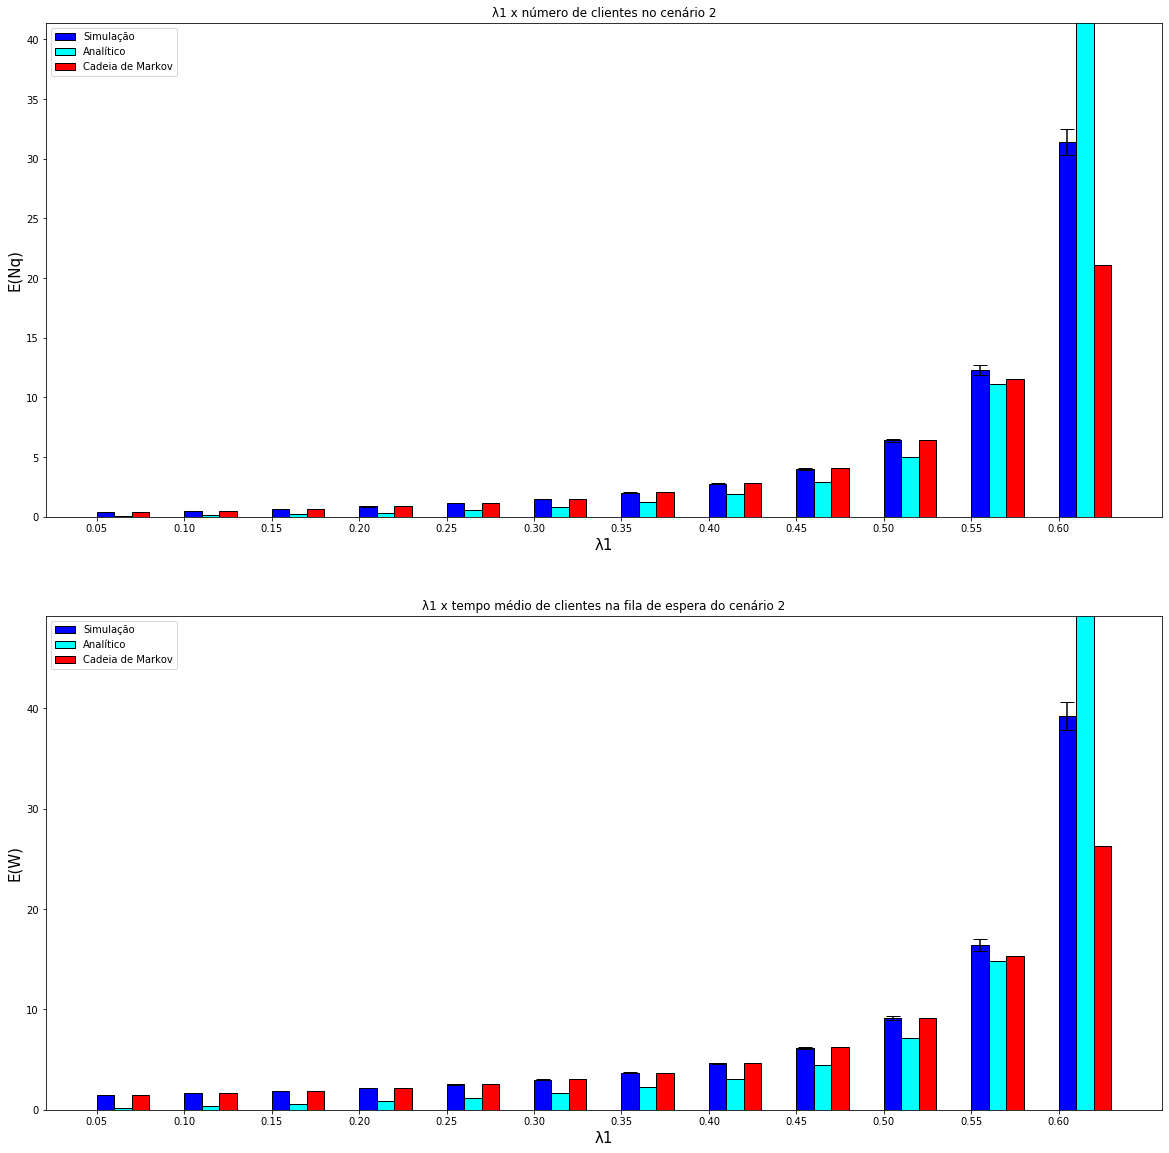

In [0]:
resultCenario2.append(resultCMCenario2[0])
resultCenario2.append(resultCMCenario2[1])

printGraficoQ3(2, resultCenario2, 65)

### Cenário 3

#### Simulação e solução analítica

In [0]:
def deterministica(L):
  return 1/L

def simulaCenario3():
  medias_Nq = [] 
  medias_NqAnalitico = []
  medias_WAnalitico = []
  medias_W = []
  medias_N = []
  medias_X = []
  medias_T = []
  ρs = []

  λs = []
  confsNq = []
  confsW = []
  confsN = []
  confsX = []
  confsρ = []
  confsT = []

  resultCenario3 = []
  for i in range(5, 65, 5): # Para cada λ1 do cenário 1 
    λ = 0.01 * i  # Gera o λ1  
    λs.append(λ) # Guarda os λ num array

    result = simulaGeral(λ , 0.2, 1, 0.5, 1000, deterministica) # Faz a simulação para cada λ
    
    resultAnal = calculoAnalitico(λ,0.2,1,0.5,0,0,'d')
    medias_Nq.append(result[1]) # Guarda o valor do E(Nq) para cada λ 
    medias_W.append(result[3]) # Guarda o valor do E(W) para cada λ
    medias_N.append(result[4])
    medias_X.append(result[5])
    ρs.append(result[6])
    medias_T.append(result[7])
    medias_NqAnalitico.append(resultAnal[0]) # Guarda o valor do E(Nq) usando Little para cada λ
    confsNq.append(result[1] - result[0][0]) # Guarda o valor da diferença entre a média e um dos extremos do intervalo de confiança para cada λ
    confsW.append(result[3] - result[2][0])
    confsN.append(result[4] - result[8][0])
    confsX.append(result[5] - result[9][0])
    confsρ.append(result[6] - result[10][0])
    confsT.append(result[7] - result[11][0])
    medias_WAnalitico.append(resultAnal[1])
  
  # Salva tudo num array geral
  resultCenario3.append(λs)
  resultCenario3.append(medias_Nq)
  resultCenario3.append(confsNq)
  resultCenario3.append(medias_W)
  resultCenario3.append(medias_NqAnalitico)
  resultCenario3.append(confsW)
  resultCenario3.append(medias_N)
  resultCenario3.append(medias_X)
  resultCenario3.append(ρs)
  resultCenario3.append(medias_T)
  resultCenario3.append(confsN)
  resultCenario3.append(confsX)
  resultCenario3.append(confsρ)
  resultCenario3.append(confsT)
  resultCenario3.append(medias_WAnalitico)
  


  return resultCenario3
  
   
resultCenario3 = simulaCenario3()

tabelaCenario3 = PrettyTable()
nomes_colunas = ['λ', 'Nº de clientes; (Intervalo de confiança)', 'E[X]; (Intervalo de confiança)', 'E[W]; (Intervalo de confiança)', 'E[T]; (Intervalo de confiança)', 'ρ; (Intervalo de confiança)', 'E[Nq]; (Intervalo de confiança)']

tabelaCenario3.add_column(nomes_colunas[0], [ round(lambd,2) for lambd in resultCenario3[0] ], align='c')
tabelaCenario3.add_column(nomes_colunas[1], [ f"{round(resultCenario3[6][i],5)}; ({round(resultCenario3[6][i]-resultCenario3[10][i],5)}, {round(resultCenario3[6][i]+resultCenario3[10][i],5)})" for i in range(len(resultCenario3[6])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[2], [ f"{round(resultCenario3[7][i],5)}; ({round(resultCenario3[7][i]-resultCenario3[11][i],5)}, {round(resultCenario3[7][i]+resultCenario3[11][i],5)})" for i in range(len(resultCenario3[7])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[3], [ f"{round(resultCenario3[3][i],5)}; ({round(resultCenario3[3][i]-resultCenario3[5][i],5)}, {round(resultCenario3[3][i]+resultCenario3[5][i],5)})" for i in range(len(resultCenario3[3])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[4], [ f"{round(resultCenario3[9][i],5)}; ({round(resultCenario3[9][i]-resultCenario3[13][i],5)}, {round(resultCenario3[9][i]+resultCenario3[13][i],5)})" for i in range(len(resultCenario3[9])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[5], [ f"{round(resultCenario3[8][i],5)}; ({round(resultCenario3[8][i]-resultCenario3[12][i],5)}, {round(resultCenario3[8][i]+resultCenario3[12][i],5)})" for i in range(len(resultCenario3[8])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[6], [ f"{round(resultCenario3[1][i],5)}; ({round(resultCenario3[1][i]-resultCenario3[2][i],5)}, {round(resultCenario3[1][i]+resultCenario3[2][i],5)})" for i in range(len(resultCenario3[1])) ], align='c' )


print(tabelaCenario3.get_string(title="Resultados do Cenário 3 - Simulação"))

#tabela2Cenario3 = PrettyTable()
#nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

#tabela2Cenario3.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario3[0] ])
#tabela2Cenario3.add_column(nomes_colunas2[1], [ f"{round(resultCenario3[1][i],5)}; ({round(resultCenario3[1][i]-resultCenario3[2][i],5)}, {round(resultCenario3[1][i]+resultCenario3[2][i],5)})" for i in range(len(resultCenario3[1])) ])
#tabela2Cenario3.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario3[4] ])


#print(tabela2Cenario3.get_string(title="Resultados do Cenário 3 - Simulação e solução analítica"))

#tabela3Cenario3 = PrettyTable()
#nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']

#tabela3Cenario3.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario3[0] ])
#tabela3Cenario3.add_column(nomes_colunas3[1], [ f"{round(resultCenario3[3][i],5)}; ({round(resultCenario3[3][i]-resultCenario3[5][i],5)}, {round(resultCenario3[3][i]+resultCenario3[5][i],5)})" for i in range(len(resultCenario3[3])) ], align='c')
#tabela3Cenario3.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario3[14] ])


#print(tabela3Cenario3.get_string(title="Resultados do Cenário 2 - Simulação e solução analítica"))


+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
|  λ   | Nº de clientes; (Intervalo de confiança) | E[X]; (Intervalo de confiança) | E[W]; (Intervalo de confiança) | E[T]; (Intervalo de confiança) | ρ; (Intervalo de confiança) | E[Nq]; (Intervalo de confiança) |
+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
| 0.05 |    1249.605; (1247.32784, 1251.88216)    |  1.79966; (1.79896, 1.80037)   |  0.73864; (0.73315, 0.74413)   |  2.53831; (2.53266, 2.54395)   | 0.44955; (0.44871, 0.45039) |   0.18466; (0.18329, 0.18603)   |
| 0.1  |    1500.534; (1498.17636, 1502.89164)    |  1.66623; (1.66552, 1.66695)   |  0.83343; (0.82779, 0.83907)   |  2.49966; (2.49387, 2.

####Cadeia de Markov

#### Comparação

In [0]:
# Tabela 2
tabela2Cenario3 = PrettyTable()
#nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]', 'Cadeia de Markov: E[Nq]']
nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

tabela2Cenario3.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario3[0] ])
tabela2Cenario3.add_column(nomes_colunas2[1], [ f"{round(resultCenario3[1][i],5)}; ({round(resultCenario3[1][i]-resultCenario3[2][i],5)}, {round(resultCenario3[1][i]+resultCenario3[2][i],5)})" for i in range(len(resultCenario3[1])) ])
tabela2Cenario3.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario3[4] ])
#tabela2Cenario3.add_column(nomes_colunas2[3], [ round(item,5) for item in resultCMCenario3[0] ] )

print(tabela2Cenario3.get_string(title="Resultados do Cenário 3 - Simulação, solução analítica e cadeia"))

# Tabela 3
tabela3Cenario3 = PrettyTable()
#nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]', 'Cadeia de Markov: E[W]']
nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']
tabela3Cenario3.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario3[0] ])
tabela3Cenario3.add_column(nomes_colunas3[1], [ f"{round(resultCenario3[3][i],5)}; ({round(resultCenario3[3][i]-resultCenario3[5][i],5)}, {round(resultCenario3[3][i]+resultCenario3[5][i],5)})" for i in range(len(resultCenario3[3])) ])
tabela3Cenario3.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario3[14] ])
#tabela3Cenario3.add_column(nomes_colunas3[3], [ round(item,5) for item in resultCMCenario3[1] ])


print(tabela3Cenario3.get_string(title="Resultados do Cenário 3 - Simulação, solução analítica e cadeia"))

+------+--------------------------------------------+------------------+
|  λ   | Simulação: E[Nq]; (Intervalo de confiança) | Analítico: E[Nq] |
+------+--------------------------------------------+------------------+
| 0.05 |        0.18466; (0.18329, 0.18603)         |     0.04354      |
| 0.1  |        0.25003; (0.24834, 0.25172)         |     0.11111      |
| 0.15 |        0.33007; (0.32795, 0.33219)         |      0.2098      |
| 0.2  |        0.43974; (0.43679, 0.44269)         |       0.35       |
| 0.25 |         0.576; (0.57216, 0.57983)          |     0.54762      |
| 0.3  |         0.76204; (0.75658, 0.7675)         |     0.82857      |
| 0.35 |        1.01539; (1.00702, 1.02377)         |     1.23846      |
| 0.4  |        1.39926; (1.38679, 1.41173)         |     1.86667      |
| 0.45 |        2.01914; (1.99681, 2.04147)         |     2.91818      |
| 0.5  |        3.21524; (3.16829, 3.26218)         |       5.0        |
| 0.55 |        6.43095; (6.26625, 6.59566)        

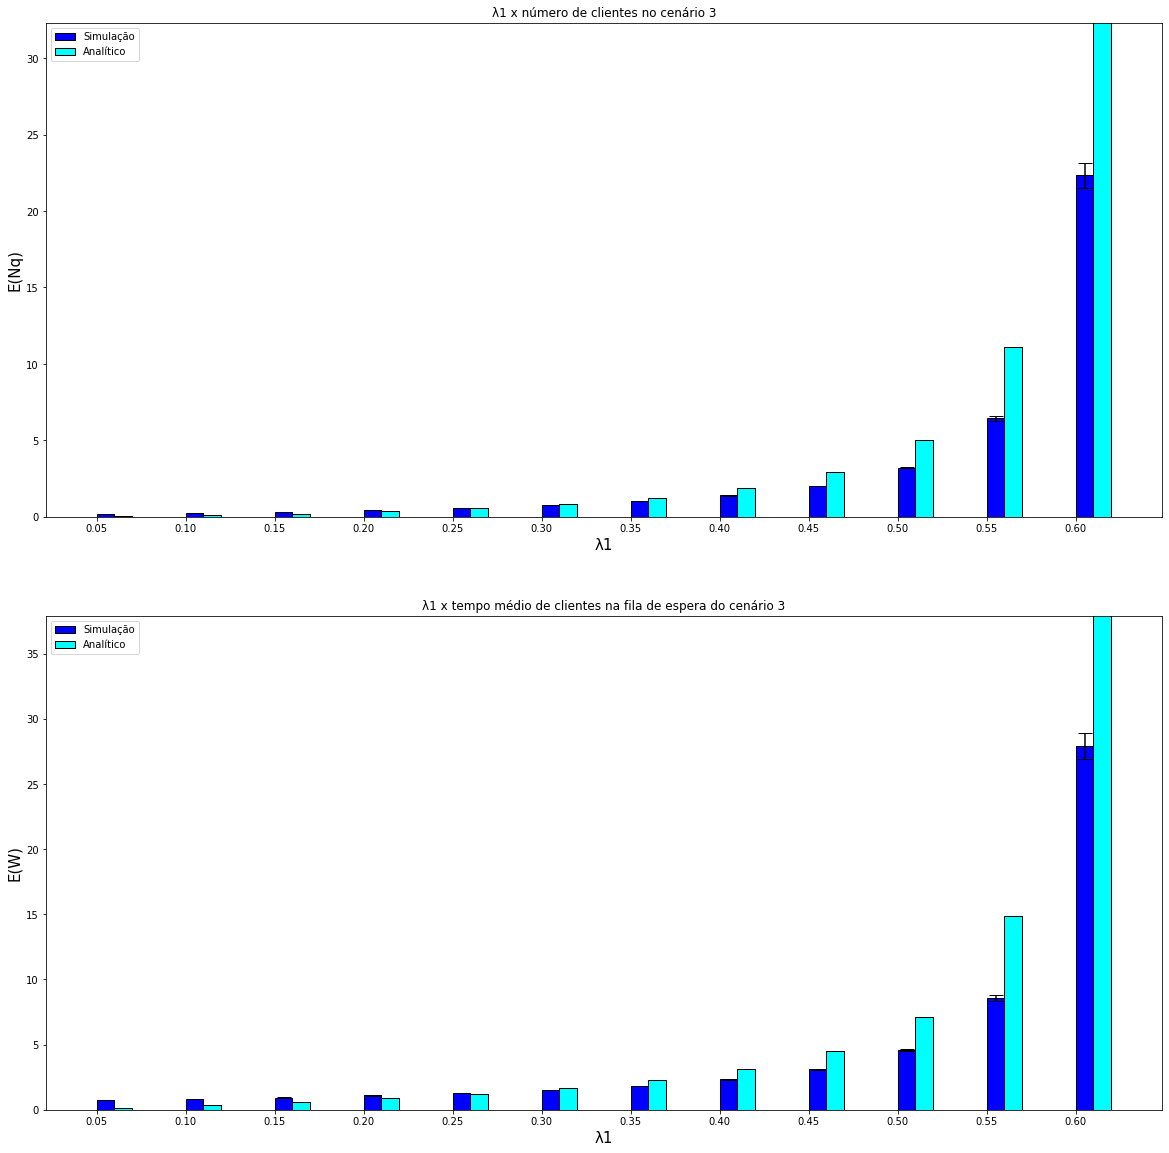

In [0]:
printGraficoQ3(3, resultCenario3, 65)

###Cenário 4

####Simulação e solução analítica

In [0]:
def uniforme(L):
  return random.uniform(L[0], L[1])

def simulaCenario4():
  medias_Nq = []
  medias_NqAnalitico = []
  medias_WAnalitico = []
  medias_W = []
  medias_N = []
  medias_X = []
  medias_T = []
  ρs = []

  λs = [0.08]
  confsNq = []
  confsW = []
  confsN = []
  confsX = []
  confsρ = []
  confsT = []
  resultCenario4 = []
    
  result = simulaGeral(0.08 , 0.05, [5,15], [1,2], 1000, uniforme) # Faz a simulação para cada λ

  resultAnal = calculoAnalitico(0.08,0.05,0,0, 5,15,1,3,'u')   

  medias_Nq.append(result[1]) # Guarda o valor do E(Nq) para cada λ 
  medias_W.append(result[3]) # Guarda o valor do E(W) para cada λ
  medias_N.append(result[4])
  medias_X.append(result[5])
  ρs.append(result[6])
  medias_T.append(result[7])
  medias_NqAnalitico.append(resultAnal[0]) # Guarda o valor do E(Nq) usando Little para cada λ
  medias_WAnalitico.append(resultAnal[1])
  confsNq.append(result[1] - result[0][0]) # Guarda o valor da diferença entre a média e um dos extremos do intervalo de confiança para cada λ
  confsW.append(result[3] - result[2][0])
  confsN.append(result[4] - result[8][0])
  confsX.append(result[5] - result[9][0])
  confsρ.append(result[6] - result[10][0])
  confsT.append(result[7] - result[11][0])
  
  # Salva tudo num array geral
  resultCenario4.append(λs)
  resultCenario4.append(medias_Nq)
  resultCenario4.append(confsNq)
  resultCenario4.append(medias_W)
  resultCenario4.append(medias_NqAnalitico)
  resultCenario4.append(confsW)
  resultCenario4.append(medias_N)
  resultCenario4.append(medias_X)
  resultCenario4.append(ρs)
  resultCenario4.append(medias_T)
  resultCenario4.append(confsN)
  resultCenario4.append(confsX)
  resultCenario4.append(confsρ)
  resultCenario4.append(confsT)
  resultCenario4.append(medias_WAnalitico)


  return resultCenario4
  
   
resultCenario4 = simulaCenario4()

tabelaCenario4 = PrettyTable()
nomes_colunas = ['λ', 'Nº de clientes; (Intervalo de confiança)', 'E[X]; (Intervalo de confiança)', 'E[W]; (Intervalo de confiança)', 'E[T]; (Intervalo de confiança)', 'ρ; (Intervalo de confiança)', 'E[Nq]; (Intervalo de confiança)']

tabelaCenario4.add_column(nomes_colunas[0], [ round(lambd,2) for lambd in resultCenario4[0] ], align='c')
tabelaCenario4.add_column(nomes_colunas[1], [ f"{round(resultCenario4[6][i],5)}; ({round(resultCenario4[6][i]-resultCenario4[10][i],5)}, {round(resultCenario4[6][i]+resultCenario4[10][i],5)})" for i in range(len(resultCenario4[6])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[2], [ f"{round(resultCenario4[7][i],5)}; ({round(resultCenario4[7][i]-resultCenario4[11][i],5)}, {round(resultCenario4[7][i]+resultCenario4[11][i],5)})" for i in range(len(resultCenario4[7])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[3], [ f"{round(resultCenario4[3][i],5)}; ({round(resultCenario4[3][i]-resultCenario4[5][i],5)}, {round(resultCenario4[3][i]+resultCenario4[5][i],5)})" for i in range(len(resultCenario4[3])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[4], [ f"{round(resultCenario4[9][i],5)}; ({round(resultCenario4[9][i]-resultCenario4[13][i],5)}, {round(resultCenario4[9][i]+resultCenario4[13][i],5)})" for i in range(len(resultCenario4[9])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[5], [ f"{round(resultCenario4[8][i],5)}; ({round(resultCenario4[8][i]-resultCenario4[12][i],5)}, {round(resultCenario4[8][i]+resultCenario4[12][i],5)})" for i in range(len(resultCenario4[8])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[6], [ f"{round(resultCenario4[1][i],5)}; ({round(resultCenario4[1][i]-resultCenario4[2][i],5)}, {round(resultCenario4[1][i]+resultCenario4[2][i],5)})" for i in range(len(resultCenario4[1])) ], align='c' )


print(tabelaCenario4.get_string(title="Resultados do Cenário 4 - Simulação"))

tabela2Cenario4 = PrettyTable()
nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

tabela2Cenario4.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario4[0] ])
tabela2Cenario4.add_column(nomes_colunas2[1], [ f"{round(resultCenario4[1][i],5)}; ({round(resultCenario4[1][i]-resultCenario4[2][i],5)}, {round(resultCenario4[1][i]+resultCenario4[2][i],5)})" for i in range(len(resultCenario4[1])) ])
tabela2Cenario4.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario4[4] ])


print(tabela2Cenario4.get_string(title="Resultados do Cenário 4 - Simulação e solução analítica"))

tabela3Cenario4 = PrettyTable()
nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']

tabela3Cenario4.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario4[0] ])
tabela3Cenario4.add_column(nomes_colunas3[1], [ f"{round(resultCenario4[3][i],5)}; ({round(resultCenario4[3][i]-resultCenario4[5][i],5)}, {round(resultCenario4[3][i]+resultCenario4[5][i],5)})" for i in range(len(resultCenario4[3])) ], align='c')
tabela3Cenario4.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario4[14] ])


print(tabela3Cenario4.get_string(title="Resultados do Cenário 2 - Simulação e solução analítica"))



+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
|  λ   | Nº de clientes; (Intervalo de confiança) | E[X]; (Intervalo de confiança) | E[W]; (Intervalo de confiança) | E[T]; (Intervalo de confiança) | ρ; (Intervalo de confiança) | E[Nq]; (Intervalo de confiança) |
+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
| 0.08 |     638.089; (636.54456, 639.63344)      |  6.80658; (6.79143, 6.82173)   | 72.06749; (69.11558, 75.01939) | 78.87407; (75.91542, 81.83272) | 0.86759; (0.86524, 0.86994) |   9.36877; (8.98503, 9.75252)   |
+------+------------------------------------------+--------------------------------+--------------------------------+-----------------------

####Cadeia de Markov

In [0]:
import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
from numpy.linalg import norm
import numpy.linalg as lin


def check_state(f1, f2, serving):
    if f1 == 0 and f2 == 0 and serving != 0:
        raise Exception("invalido: se sistema está vazio, não pode ter ninguém sendo servido")
    if f1 > 0 and f2 > 0 and serving != 1 and serving != 2:
        raise Exception("invalido: se sistema está ocupado, tem que estar sevindo alguém")
    if f1 > 0 and f2 == 0 and serving != 1:
        raise Exception("invalido: se só há clientes do tipo 1, então tem que estar servindo o tipo 1")
    if f1 == 0 and f2 > 0 and serving != 2:
        raise Exception("invalido: se só há clientes do tipo 2, então tem que estar servindo o tipo 2")

def get_state_name(f1, f2, serving):
    check_state(f1, f2, serving)
    
    s1 = "*" if serving == 1 else " "
    s2 = "*" if serving == 2 else " "
    return f"{f1:5}{s1}/{f2:5}{s2}"

def get_next_states(f1, f2, serving, λ1, λ2, µ1, µ2):
    check_state(f1, f2, serving)

    r = {}
    
    # Chegada de um cliente do tipo 1:
    if serving == 0:
        r[get_state_name(f1+1,f2,1)] = λ1
    else:
        r[get_state_name(f1+1,f2,serving)] = λ1
    
    # Chegada de um cliente do tipo 2:
    if f1 == 0:
        r[get_state_name(0,f2+1,2)] = λ2
    else:
        r[get_state_name(f1,f2+1,serving)] = λ2
    
    # Saida de um cliente do tipo 1:
    if serving == 1:
        if f1 > 1:
            r[get_state_name(f1-1,f2,1)] = µ1
        elif f2 > 0:
            r[get_state_name(0,f2,2)] = µ1
        else:
            r[get_state_name(0,0,0)] = µ1
    
    # Saida de um cliente do tipo 2:
    if serving == 2:
        if f1 > 0:
            r[get_state_name(f1,f2-1,1)] = µ2
        elif f2 > 1:
            r[get_state_name(0,f2-1,2)] = µ2
        else:
            r[get_state_name(0,0,0)] = µ2

    return r

def create_ctmc_states(size, λ1, λ2, µ1, µ2):
    states = {}

    # adding state " 0 / 0 "
    states[get_state_name(0,0,0)] = get_next_states(0,0,0, λ1, λ2, µ1, µ2)

    for f1 in range(0,size):
        for f2 in range(0,size):

            if f1 == 0 and f2 == 0:
                serve_list = []
            elif f1 == 0:
                serve_list = [2]
            elif f2 == 0:
                serve_list = [1]
            else:
                serve_list = [1,2]

            for serving in serve_list:
                states[get_state_name(f1,f2,serving)] = get_next_states(f1,f2,serving, λ1, λ2, µ1, µ2)
    return states

def create_ctmc_matrix(size, λ1, λ2, µ1, µ2):
    states = create_ctmc_states(size, λ1, λ2, µ1, µ2)
    df = pd.DataFrame(states)
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.sort_index()
    df = df.transpose()
    df = df[df.index]
    columns = df.columns
    np.fill_diagonal(df.values, -df.sum(axis=1))
    df = df.fillna(0)
    return df.to_numpy(), columns



# Calcula os π
def calculaCadeiaMarkovCenario4(λ1, λ2, µ1, µ2):

  result = create_ctmc_matrix(40, λ1, λ2, µ1, µ2)
  Q = result[0]
  columns = result[1]

  # Trecho a seguir calcula os π
  sz = Q.shape[0]
  Qt = Q.transpose()
  Qt[sz-1,:] = 1
  b = np.zeros((sz,1))
  b[sz-1] = 1
  x = lin.solve(Qt.T.dot(Qt), Qt.T.dot(b))


  πi = {}

  # Agrupa os πi que apresentam o mesmo número de pessoas no sistema para um único π
  for i in range(len(columns)):
    txt = columns[i].split(",")
    for k in range(len(txt)):
      txt2 = txt[k].split("/")
      t1 = txt2[0].replace("*","")
      t2 = txt2[1].replace("*","")
      txt2 = (t1, t2)
      numberCustumerSystem = int(txt2[0])+int(txt2[1])
      if numberCustumerSystem in πi:
        πi[numberCustumerSystem] = x[i] + πi[numberCustumerSystem]
      else:
        πi[numberCustumerSystem] = x[i]

  return list(πi.values())   



def cadeiaMarkovCenario4():
  Nqs = []
  W = []
  Nq = 0
  λ1 = 0.08
  λ2 = 0.05
  µ1 = (5 + 15)/2
  µ2 = (1 + 3)/2
  πk = (calculaCadeiaMarkovCenario4(λ1, λ2, µ1, µ2))

  Nq = 0
  # Faz os cálculos dos Nq e W
  for j in range(1,len(πk)):
    if(πk[j] < 0):
      Nq += 0
    else:
      Nq += (j-1)*πk[j]
  Nqs.append(Nq[0])
  W.append(Nq[0]/(λ1+λ2))
  return [Nqs, W]

resultCMCenario4 = cadeiaMarkovCenario4()
print("Nq:",resultCMCenario4[0])
print("W:",resultCMCenario4[1])

Nq: [0.0017658203207171343]
W: [0.013583233236285647]


####Comparação

In [0]:
# Tabela 2
tabela2Cenario4 = PrettyTable()
nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]', 'Cadeia de Markov: E[Nq]']

tabela2Cenario4.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario4[0] ])
tabela2Cenario4.add_column(nomes_colunas2[1], [ f"{round(resultCenario4[1][i],5)}; ({round(resultCenario4[1][i]-resultCenario4[2][i],5)}, {round(resultCenario4[1][i]+resultCenario4[2][i],5)})" for i in range(len(resultCenario4[1])) ])
tabela2Cenario4.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario4[4] ])
tabela2Cenario4.add_column(nomes_colunas2[3], [ round(item,5) for item in resultCMCenario4[0] ] )

print(tabela2Cenario4.get_string(title="Resultados do Cenário 4 - Simulação, solução analítica e cadeia"))

# Tabela 3
tabela3Cenario4 = PrettyTable()
nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]', 'Cadeia de Markov: E[W]']

tabela3Cenario4.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario4[0] ])
tabela3Cenario4.add_column(nomes_colunas3[1], [ f"{round(resultCenario4[3][i],5)}; ({round(resultCenario4[3][i]-resultCenario4[5][i],5)}, {round(resultCenario4[3][i]+resultCenario4[5][i],5)})" for i in range(len(resultCenario4[3])) ])
tabela3Cenario4.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario4[14] ])
tabela3Cenario4.add_column(nomes_colunas3[3], [ round(item,5) for item in resultCMCenario4[1] ])


print(tabela3Cenario4.get_string(title="Resultados do Cenário 4 - Simulação, solução analítica e cadeia"))

+------+--------------------------------------------+------------------+-------------------------+
|  λ   | Simulação: E[Nq]; (Intervalo de confiança) | Analítico: E[Nq] | Cadeia de Markov: E[Nq] |
+------+--------------------------------------------+------------------+-------------------------+
| 0.08 |        9.36877; (8.98503, 9.75252)         |     13.06933     |         0.00177         |
+------+--------------------------------------------+------------------+-------------------------+
+------+-------------------------------------------+-----------------+------------------------+
|  λ   | Simulação: E[W]; (Intervalo de confiança) | Analítico: E[W] | Cadeia de Markov: E[W] |
+------+-------------------------------------------+-----------------+------------------------+
| 0.08 |       72.06749; (69.11558, 75.01939)      |    100.53333    |        0.01358         |
+------+-------------------------------------------+-----------------+------------------------+


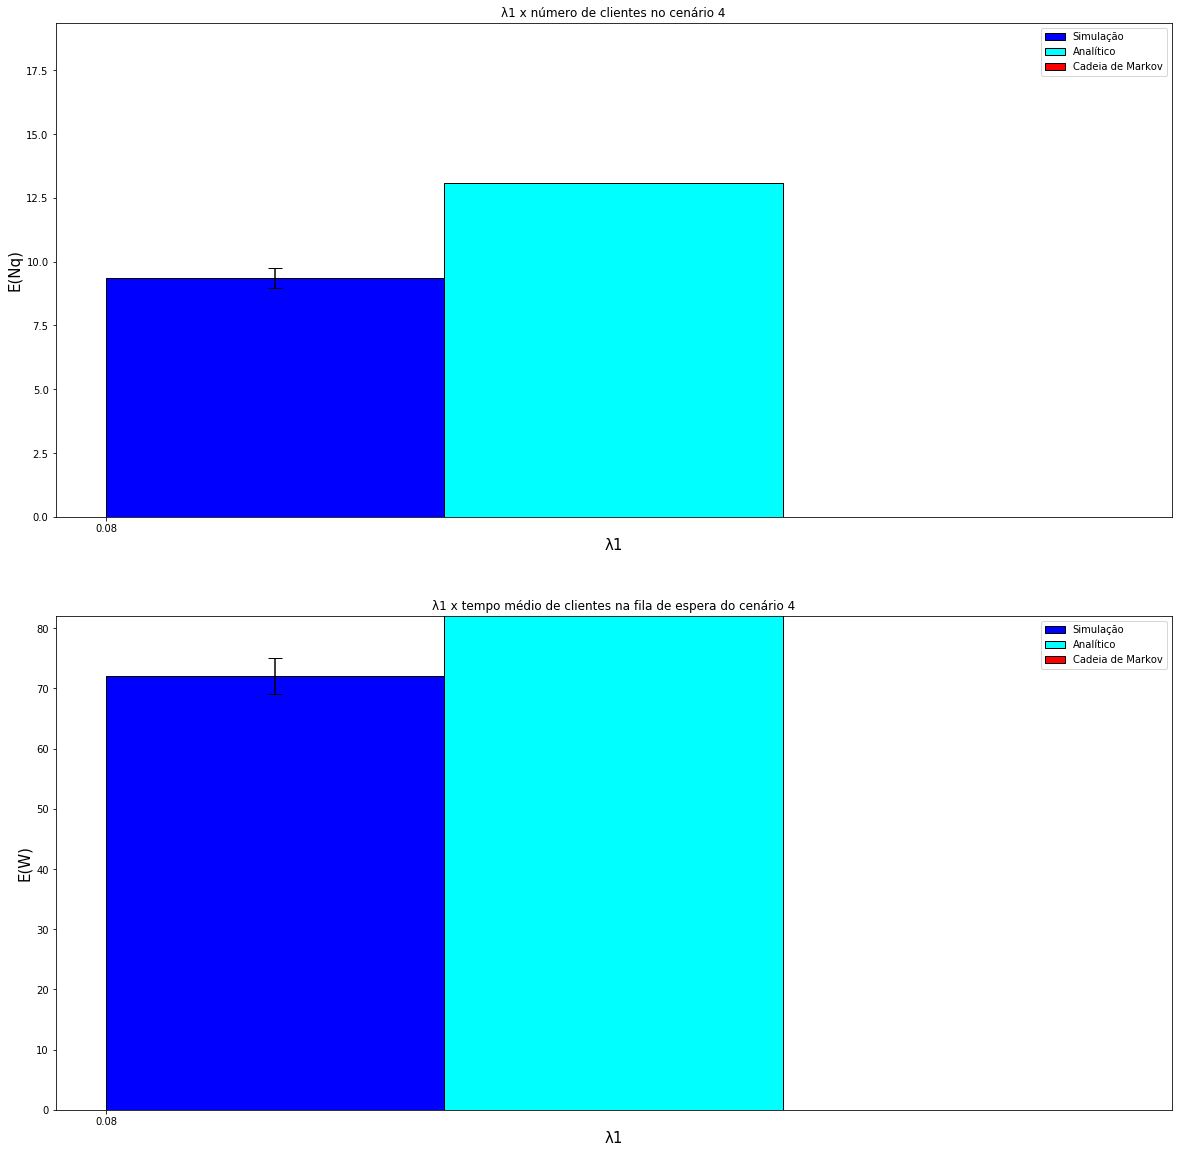

In [0]:
resultCenario4.append(resultCMCenario4[0])
resultCenario4.append(resultCMCenario4[1])
printGraficoQ3(4, resultCenario4, 0)